# Can we identify the need for panel cleaning/maintenance?

## Prepare

In [161]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data set (we use plant 2 here)

plant2_g = pd.read_csv('./data/Plant_2_Generation_Data.csv')
plant2_s = pd.read_csv('./data/Plant_2_Weather_Sensor_Data.csv')

# Find the size of data
print(plant2_g.shape)
print(plant2_s.shape)

(67698, 7)
(3259, 6)


In [162]:
# Details about the generation data
print(plant2_g.sample(5))
print("We have",len(plant2_g.SOURCE_KEY .unique()),"inverters for plant 2 generation data.")

                 DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER    AC_POWER  \
3605   2020-05-16 17:00:00   4136001  vOuJvMaM2sgwLmb  141.328571  138.164286   
32767  2020-06-01 10:30:00   4136001  LYwnQax7tkwH5Cb  700.973333  685.800000   
9504   2020-05-19 12:15:00   4136001  4UPUqMRk7TRMgml    0.000000    0.000000   
45911  2020-06-07 16:15:00   4136001  oZ35aAeoifZaQzV  552.720000  541.320000   
30987  2020-05-31 14:15:00   4136001  Mx2yZCDsyf6DPfv  794.513333  776.646667   

       DAILY_YIELD   TOTAL_YIELD  
3605   4863.000000  2.226399e+06  
32767  1980.533333  1.795049e+09  
9504   1508.000000  2.454380e+06  
45911  7329.666667  1.660142e+09  
30987  5627.266667  2.584571e+06  
We have 22 inverters for plant 2 generation data.


In [163]:
# Details about the  weather sensor data
plant2_s.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1745,2020-06-02 05:15:00,4136001,iq8k7ZNt4Mwm3w0,23.055029,21.936602,0.000000
2926,2020-06-14 12:45:00,4136001,iq8k7ZNt4Mwm3w0,32.103895,52.801106,0.884950
2740,2020-06-12 14:15:00,4136001,iq8k7ZNt4Mwm3w0,27.018878,37.320930,0.418316
377,2020-05-18 22:30:00,4136001,iq8k7ZNt4Mwm3w0,26.022665,24.672434,0.000000
440,2020-05-19 14:15:00,4136001,iq8k7ZNt4Mwm3w0,34.402327,50.247674,0.701812


In [164]:
# Join table
data = pd.merge(plant2_s, plant2_g, on='DATE_TIME', how='outer', suffixes=('_s', '_g'))
data[['DATE', 'TIME']] = data['DATE_TIME'].str.split(' ', expand=True)
print(data.sample(5))


                 DATE_TIME  PLANT_ID_s     SOURCE_KEY_s  AMBIENT_TEMPERATURE  \
32903  2020-06-01 12:00:00     4136001  iq8k7ZNt4Mwm3w0            32.097253   
25248  2020-05-28 16:30:00     4136001  iq8k7ZNt4Mwm3w0            36.296041   
4675   2020-05-17 05:15:00     4136001  iq8k7ZNt4Mwm3w0            24.856989   
63108  2020-06-15 19:45:00     4136001  iq8k7ZNt4Mwm3w0            25.544365   
10058  2020-05-19 18:45:00     4136001  iq8k7ZNt4Mwm3w0            23.401081   

       MODULE_TEMPERATURE  IRRADIATION  PLANT_ID_g     SOURCE_KEY_g  \
32903           53.477917     1.079779     4136001  PeE6FRyGXUgsRhN   
25248           43.555332     0.331142     4136001  Qf4GUc1pJu5T6c6   
4675            23.203092     0.000000     4136001  Quc1TzYxW2pYoWX   
63108           24.447017     0.000000     4136001  NgDl19wMapZy17u   
10058           21.831253     0.002256     4136001  IQ2d7wF4YD8zU1Q   

         DC_POWER    AC_POWER  DAILY_YIELD   TOTAL_YIELD        DATE      TIME  
32903  333.

## Testing

### By single day (May-18)

In [170]:
may_18_data = data[data['DATE'] == '2020-05-18']
may_18_data

,DATE_TIME,PLANT_ID_s,SOURCE_KEY_s,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_g,SOURCE_KEY_g,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
6314,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,4UPUqMRk7TRMgml,0.0,0.0,6342.000000,2.445231e+06,2020-05-18,00:00:00
6315,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215293e+09,2020-05-18,00:00:00
6316,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,9kRcWv60rDACzjR,0.0,0.0,2225.333333,2.247743e+09,2020-05-18,00:00:00
6317,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,Et9kgGMDl729KT4,0.0,0.0,306.866667,1.719490e+06,2020-05-18,00:00:00
6318,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,2396.000000,1.996631e+07,2020-05-18,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,q49J1IKaHRwDQnt,0.0,0.0,4161.000000,3.624400e+05,2020-05-18,23:45:00
8422,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,rrq4fwE8jgrTyWY,0.0,0.0,4215.000000,1.209862e+08,2020-05-18,23:45:00
8423,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4119.500000,2.237035e+06,2020-05-18,23:45:00
8424,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,xMbIugepa2P7lBB,0.0,0.0,7696.000000,1.066886e+08,2020-05-18,23:45:00


/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/741637607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')


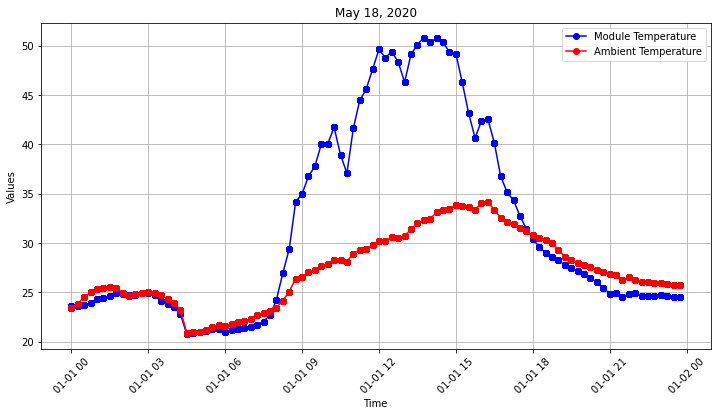

In [166]:


# Converting TIME to datetime format
may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.plot(may_18_data['TIME'], may_18_data['MODULE_TEMPERATURE'], marker='o', linestyle='-', color='b', label='Module Temperature')
plt.plot(may_18_data['TIME'], may_18_data['AMBIENT_TEMPERATURE'], marker='o', linestyle='-', color='r', label='Ambient Temperature')
plt.title('May 18, 2020')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




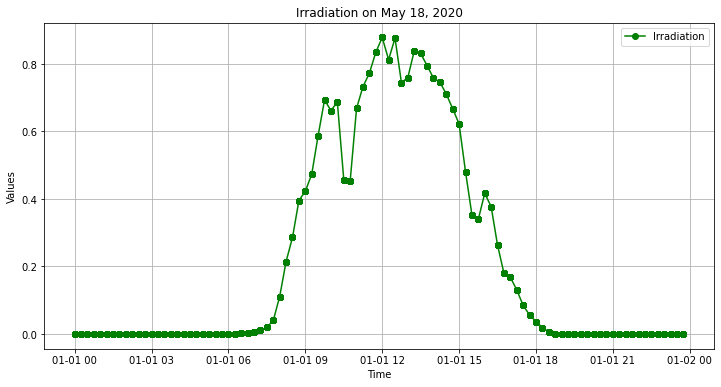

In [167]:

plt.figure(figsize=(12, 6))
plt.plot(may_18_data['TIME'], may_18_data['IRRADIATION'], marker='o', linestyle='-', color='g', label='Irradiation')
plt.title('Irradiation on May 18, 2020')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




### All the dates

/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/379162971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/379162971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/379162971.py:11: SettingWithCopyWarning: 
A v

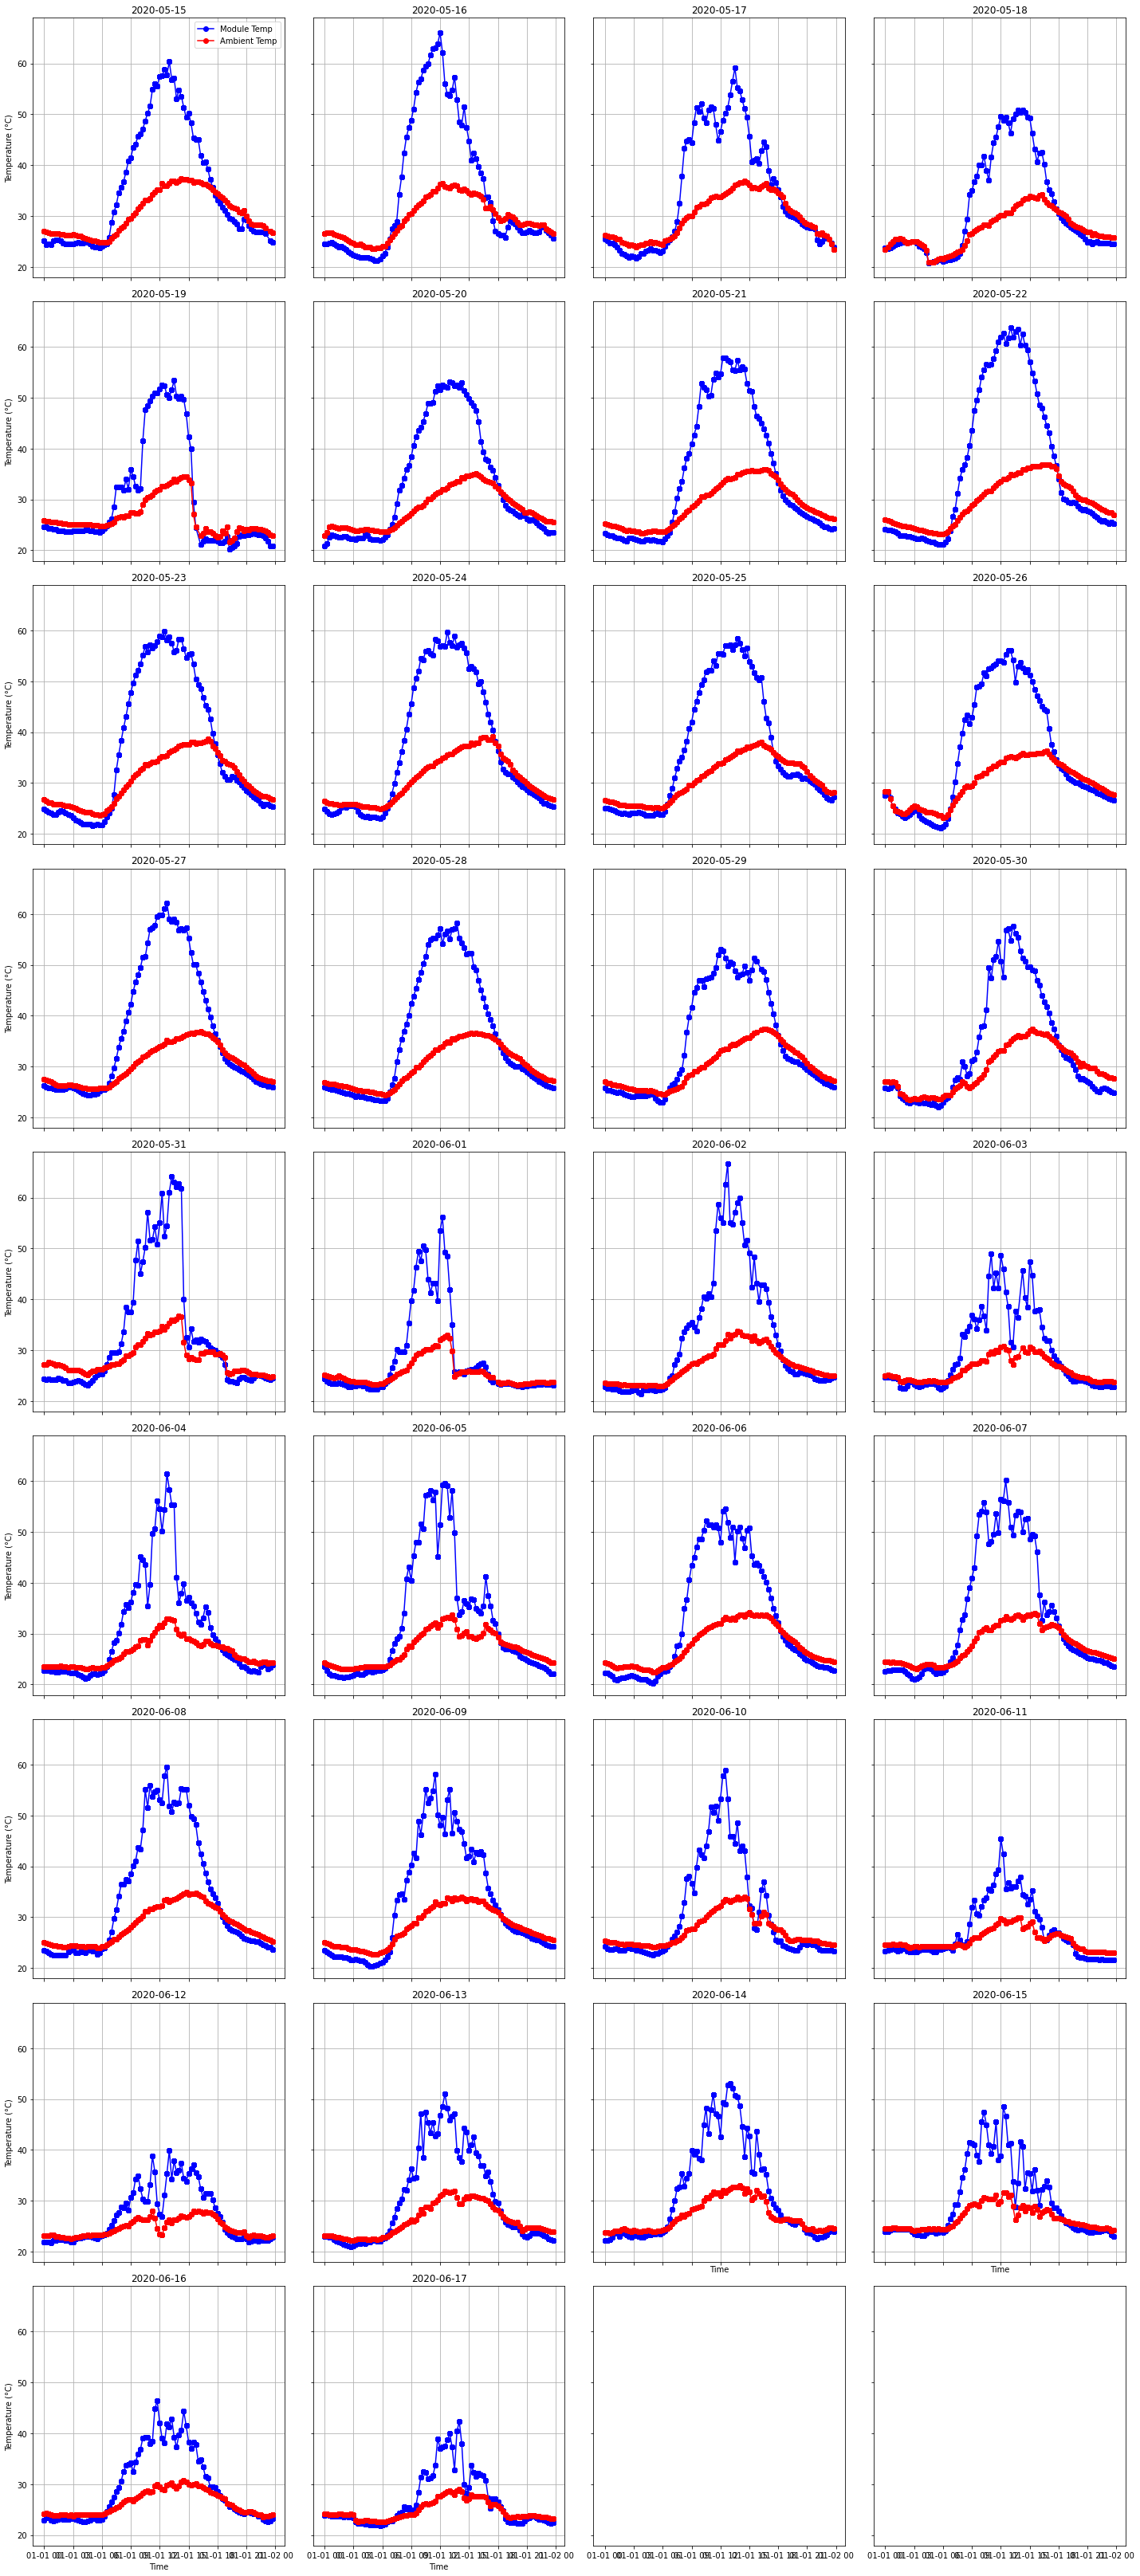

In [169]:
# Plotting MODULE_TEMPERATURE and AMBIENT_TEMPERATURE vs TIME for all dates
unique_dates = data['DATE'].unique()
num_dates = len(unique_dates)

# Setting up the plot grid
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 45), sharex=True, sharey=True)
axes = axes.flatten()

for i, date in enumerate(unique_dates):
    date_data = data[data['DATE'] == date]
    date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
    
    ax = axes[i]
    ax.plot(date_data['TIME'], date_data['MODULE_TEMPERATURE'], marker='o', linestyle='-', color='b', label='Module Temp')
    ax.plot(date_data['TIME'], date_data['AMBIENT_TEMPERATURE'], marker='o', linestyle='-', color='r', label='Ambient Temp')
    ax.set_title(date)
    ax.grid(True)
    if i % 4 == 0:
        ax.set_ylabel('Temperature (°C)')
    if i >= (num_dates - 4):
        ax.set_xlabel('Time')
    if i == 0:
        ax.legend()

# Adjusting layout
plt.tight_layout()
plt.show()